# Operaciones de Aprendizaje Automático

## Proyecto: Secondary Mushroom Dataset

## Integrantes del Equipo 14:

- Rubén Díaz García A01371849
- Jorge Chávez Badillo A01749448
- José Manuel García Ogarrio A01795147
- Paúl Andrés Yungán Pinduisaca A01795702
- Ana Gabriela Fuentes Hernández A01383717
- David Emmanuel Villanueva Martínez A01638389

## Librerías Necesarias


In [171]:
pip install ucimlrepo

In [172]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

## 1. Manipulación y preparación de datos

In [173]:
# fetch dataset
secondary_mushroom = fetch_ucirepo(id=848)

# features and Labels
X = secondary_mushroom.data.features
y = secondary_mushroom.data.targets

# Complete dataset
print(secondary_mushroom.metadata,  "\n")
print(secondary_mushroom.variables, "\n")

# variable information
print(secondary_mushroom.variables)

{'uci_id': 848, 'name': 'Secondary Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/848/data.csv', 'abstract': 'Dataset of simulated mushrooms for binary classification into edible and poisonous.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 61068, 'num_features': 20, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2021, 'last_updated': 'Wed Apr 10 2024', 'dataset_doi': '10.24432/C5FP5Q', 'creators': ['Dennis Wagner', 'D. Heider', 'Georges Hattab'], 'intro_paper': {'ID': 259, 'type': 'NATIVE', 'title': 'Mushroom data creation, curation, and simulation to support classification tasks', 'authors': 'Dennis Wagner, D. Heider, Georges Hattab', 'venue': 'Scientific Reports', 'year': 2021, 'journal': None, '

In [174]:
# Convertir X y y en un DataFrame completo
data = pd.concat([X, y], axis=1)

In [175]:
data.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [176]:
data.describe(include='object')

,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class
count,61069,46949,61069,61069,51185,36006,61069,9531,22945,61069,3177,7413,61069,58598,6354,61069,61069,61069
unique,7,11,12,2,7,3,12,5,8,13,1,6,2,8,7,8,4,2
top,x,t,n,f,a,c,w,s,s,w,u,w,f,f,k,d,a,p
freq,26934,8196,24218,50479,12698,24710,18521,3177,6025,22926,3177,5474,45890,48361,2118,44209,30177,33888


In [177]:
data.shape

(61069, 21)

In [178]:
# Verificar valores nulos en el DataFrame original
print("Valores nulos en el DataFrame original:")
print(data.isnull().sum()/len(data)*100)

Valores nulos en el DataFrame original:
cap-diameter             0.000000
cap-shape                0.000000
cap-surface             23.121387
cap-color                0.000000
does-bruise-or-bleed     0.000000
gill-attachment         16.184971
gill-spacing            41.040462
gill-color               0.000000
stem-height              0.000000
stem-width               0.000000
stem-root               84.393064
stem-surface            62.427746
stem-color               0.000000
veil-type               94.797688
veil-color              87.861272
has-ring                 0.000000
ring-type                4.046243
spore-print-color       89.595376
habitat                  0.000000
season                   0.000000
class                    0.000000
dtype: float64


In [179]:
# Se eliminaron las columnas con más del 20% de valores nulos para evitar sesgos en el análisis
# y modelos de aprendizaje automático. La presencia de una gran cantidad de valores nulos en una columna puede afectar la precisión del modelo

# Calcular el porcentaje de valores nulos para cada columna
null_percentage = data.isnull().sum() / len(data) * 100

# Identificar las columnas con más del 20% de valores nulos
columns_to_drop = null_percentage[null_percentage > 20].index.tolist()

columns_to_drop

['cap-surface',
 'gill-spacing',
 'stem-root',
 'stem-surface',
 'veil-type',
 'veil-color',
 'spore-print-color']

In [180]:
data_cleaned = data.drop(columns=columns_to_drop)

print("Columnas dropeadas:")
for column in columns_to_drop:
  print(f"- {column}: Más del 20% de valores nulos.")

Columnas dropeadas:
- cap-surface: Más del 20% de valores nulos.
- gill-spacing: Más del 20% de valores nulos.
- stem-root: Más del 20% de valores nulos.
- stem-surface: Más del 20% de valores nulos.
- veil-type: Más del 20% de valores nulos.
- veil-color: Más del 20% de valores nulos.
- spore-print-color: Más del 20% de valores nulos.


In [181]:
# Verificar valores únicos en cada columna
for col in data_cleaned.select_dtypes(include='object').columns:
    print(f'Valores únicos en {col}: {data_cleaned[col].unique()}')

Valores únicos en cap-shape: ['x' 'f' 'p' 'b' 'c' 's' 'o']
Valores únicos en cap-color: ['o' 'e' 'n' 'g' 'r' 'w' 'y' 'p' 'u' 'b' 'l' 'k']
Valores únicos en does-bruise-or-bleed: ['f' 't']
Valores únicos en gill-attachment: ['e' nan 'a' 'd' 's' 'x' 'p' 'f']
Valores únicos en gill-color: ['w' 'n' 'p' 'u' 'b' 'g' 'y' 'r' 'e' 'o' 'k' 'f']
Valores únicos en stem-color: ['w' 'y' 'n' 'u' 'b' 'l' 'r' 'p' 'e' 'k' 'g' 'o' 'f']
Valores únicos en has-ring: ['t' 'f']
Valores únicos en ring-type: ['g' 'p' 'e' 'l' 'f' 'm' nan 'r' 'z']
Valores únicos en habitat: ['d' 'm' 'g' 'h' 'l' 'p' 'w' 'u']
Valores únicos en season: ['w' 'u' 'a' 's']
Valores únicos en class: ['p' 'e']


In [182]:
data_cleaned.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [183]:
data_cleaned.describe(include='object')

,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-color,has-ring,ring-type,habitat,season,class
count,61069,61069,61069,51185,61069,61069,61069,58598,61069,61069,61069
unique,7,12,2,7,12,13,2,8,8,4,2
top,x,n,f,a,w,w,f,f,d,a,p
freq,26934,24218,50479,12698,18521,22926,45890,48361,44209,30177,33888


In [184]:
data_cleaned[['gill-attachment', 'ring-type']] = data_cleaned[['gill-attachment', 'ring-type']].fillna('no_data')

## Exploración y Preprocesamiento de Datos

In [185]:
data_cleaned.describe(include='object')

,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-color,has-ring,ring-type,habitat,season,class
count,61069,61069,61069,61069,61069,61069,61069,61069,61069,61069,61069
unique,7,12,2,8,12,13,2,9,8,4,2
top,x,n,f,a,w,w,f,f,d,a,p
freq,26934,24218,50479,12698,18521,22926,45890,48361,44209,30177,33888


In [186]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          61069 non-null  float64
 1   cap-shape             61069 non-null  object 
 2   cap-color             61069 non-null  object 
 3   does-bruise-or-bleed  61069 non-null  object 
 4   gill-attachment       61069 non-null  object 
 5   gill-color            61069 non-null  object 
 6   stem-height           61069 non-null  float64
 7   stem-width            61069 non-null  float64
 8   stem-color            61069 non-null  object 
 9   has-ring              61069 non-null  object 
 10  ring-type             61069 non-null  object 
 11  habitat               61069 non-null  object 
 12  season                61069 non-null  object 
 13  class                 61069 non-null  object 
dtypes: float64(3), object(11)
memory usage: 6.5+ MB


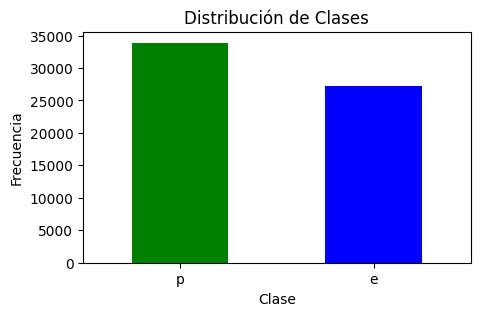

In [187]:
class_counts = data_cleaned['class'].value_counts()

# Graficar
plt.figure(figsize=(5, 3))
class_counts.plot(kind='bar', color=['green','blue'])
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

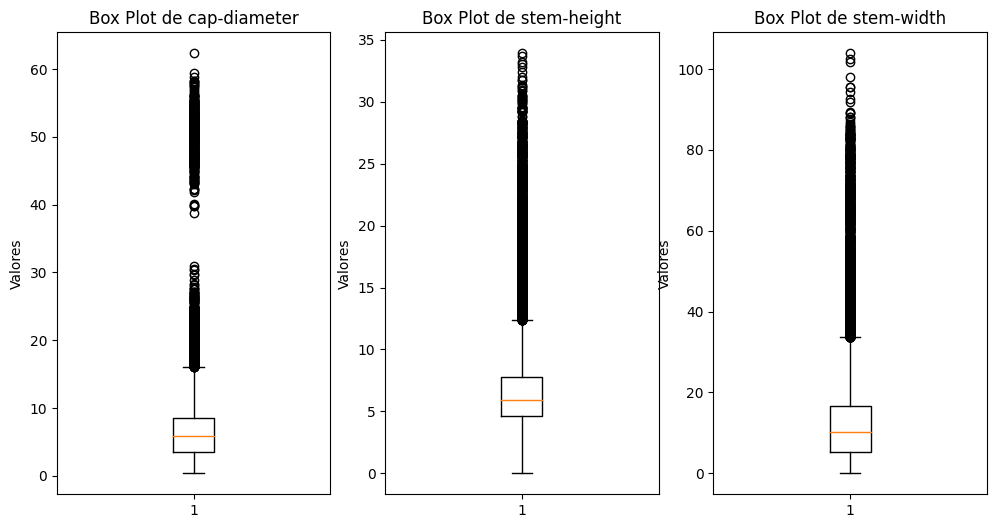

In [188]:
columnas = data_cleaned.select_dtypes(include=np.number).columns

plt.figure(figsize=(12, 6))
for i, columna in enumerate(columnas, 1):
    plt.subplot(1, len(columnas), i)
    plt.boxplot(data_cleaned[columna])
    plt.title(f'Box Plot de {columna}')
    plt.ylabel('Valores')

plt.show()

In [189]:
columnas = data_cleaned.select_dtypes(include=np.number).columns

data_v2 = data_cleaned.copy()

print(f"Porcentaje de valores atípicos eliminados:")

for columna in columnas:

    # Calcular el IQR
    Q1 = data_cleaned[columna].quantile(0.25)
    Q3 = data_cleaned[columna].quantile(0.75)

    IQR = Q3 - Q1

    # Definir el rango para identificar valores atípicos
    rango_atipico = 1.5 * IQR

    # Identificar los valores atípicos
    valores_atipicos = (data_cleaned[columna] < Q1 - rango_atipico) | (data_cleaned[columna] > Q3 + rango_atipico)

    # Calcular el porcentaje de valores atípicos
    porcentaje_valores_atipicos = (valores_atipicos.sum() / len(data_cleaned)) * 100

    # Eliminar los registros que contengan valores atípicos
    data_v2 = data_v2[~valores_atipicos]

    print(f"{columna}: {porcentaje_valores_atipicos:.2f}%")

# Porcentaje de registros eliminados
porcentaje_registros_eliminados = ((len(data_cleaned) - len(data_v2)) / len(data_cleaned)) * 100

print(f"Porcentaje de registros eliminados: {porcentaje_registros_eliminados:.2f}%")

Porcentaje de valores atípicos eliminados:
cap-diameter: 3.93%
stem-height: 5.19%
stem-width: 3.22%
Porcentaje de registros eliminados: 8.74%


<ipython-input-189-bc1c9c2d7676>:25: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-189-bc1c9c2d7676>:25: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



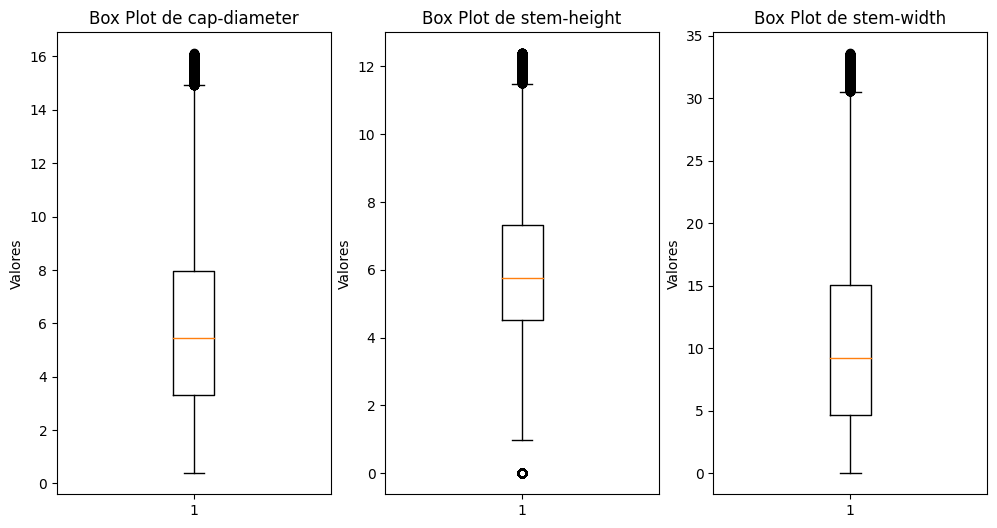

In [190]:
columnas = data_v2.select_dtypes(include=np.number).columns

plt.figure(figsize=(12, 6))
for i, columna in enumerate(columnas, 1):
    plt.subplot(1, len(columnas), i)
    plt.boxplot(data_v2[columna])
    plt.title(f'Box Plot de {columna}')
    plt.ylabel('Valores')

plt.show()

In [191]:
len(data)

61069

In [192]:
len(data_v2)

55729

In [193]:
X = data_v2.drop('class', axis=1)
y = data_v2['class']

In [194]:
# Particionamos en Train, Validation y Test en 60-20-20:
Xtrain, Xtv, ytrain, ytv = train_test_split(X, y, train_size=0.6, shuffle=True, random_state=5, stratify=y)
Xval, Xtest, yval, ytest = train_test_split(Xtv, ytv, test_size=0.5, shuffle=True, random_state=7, stratify=ytv)

In [195]:
Xtrain.shape, Xval.shape, Xtest.shape

((33437, 13), (11146, 13), (11146, 13))

In [196]:
ytrain.shape, yval.shape, ytest.shape

((33437,), (11146,), (11146,))

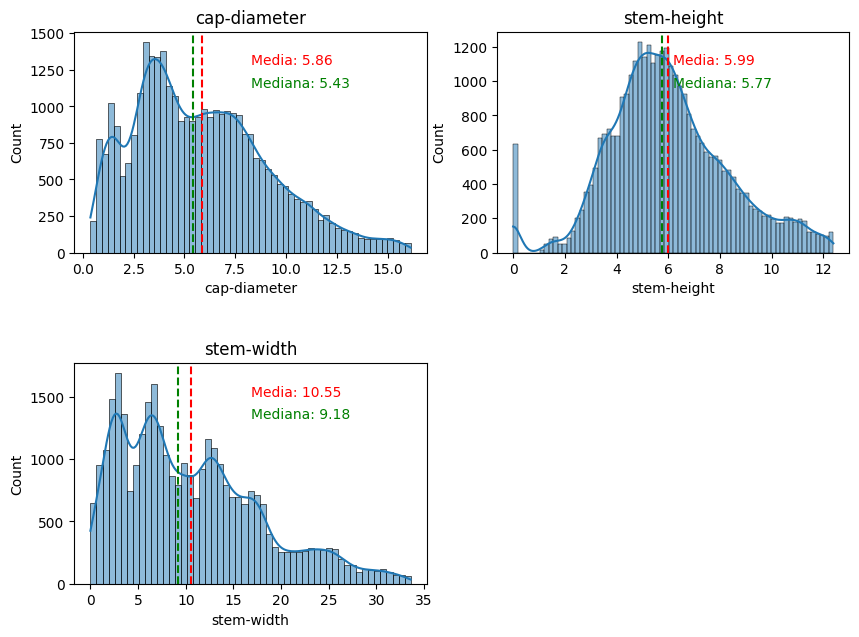

In [197]:
fila = 0
columna = 0

columnas = Xtrain.select_dtypes(include=np.number).columns

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

plt.subplots_adjust(right=0.9, top=0.8, hspace=0.5)

for columna_actual in columnas:

    ax = axs[fila, columna]
    sns.histplot(Xtrain[columna_actual], ax=ax, kde=True)
    ax.set_title(columna_actual)


    media = Xtrain[columna_actual].mean()
    mediana = Xtrain[columna_actual].median()


    ax.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
    ax.axvline(mediana, color='green', linestyle='--', label=f'Mediana: {mediana}')


    ax.text(0.5, 0.85, f'Media: {media:.2f}', transform=ax.transAxes, color='red')
    ax.text(0.5, 0.75, f'Mediana: {mediana}', transform=ax.transAxes, color='green')

    columna += 1
    if columna == 2:
        fila += 1
        columna = 0

axs[fila, columna].axis('off')

plt.show()

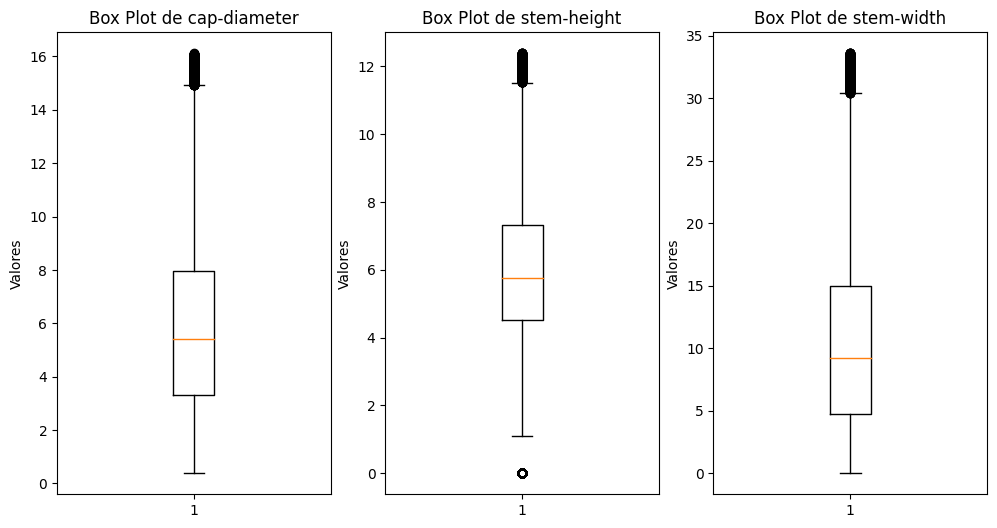

In [198]:
columnas = Xtrain.select_dtypes(include=np.number).columns

plt.figure(figsize=(12, 6))
for i, columna in enumerate(columnas, 1):
    plt.subplot(1, len(columnas), i)
    plt.boxplot(Xtrain[columna])
    plt.title(f'Box Plot de {columna}')
    plt.ylabel('Valores')

plt.show()

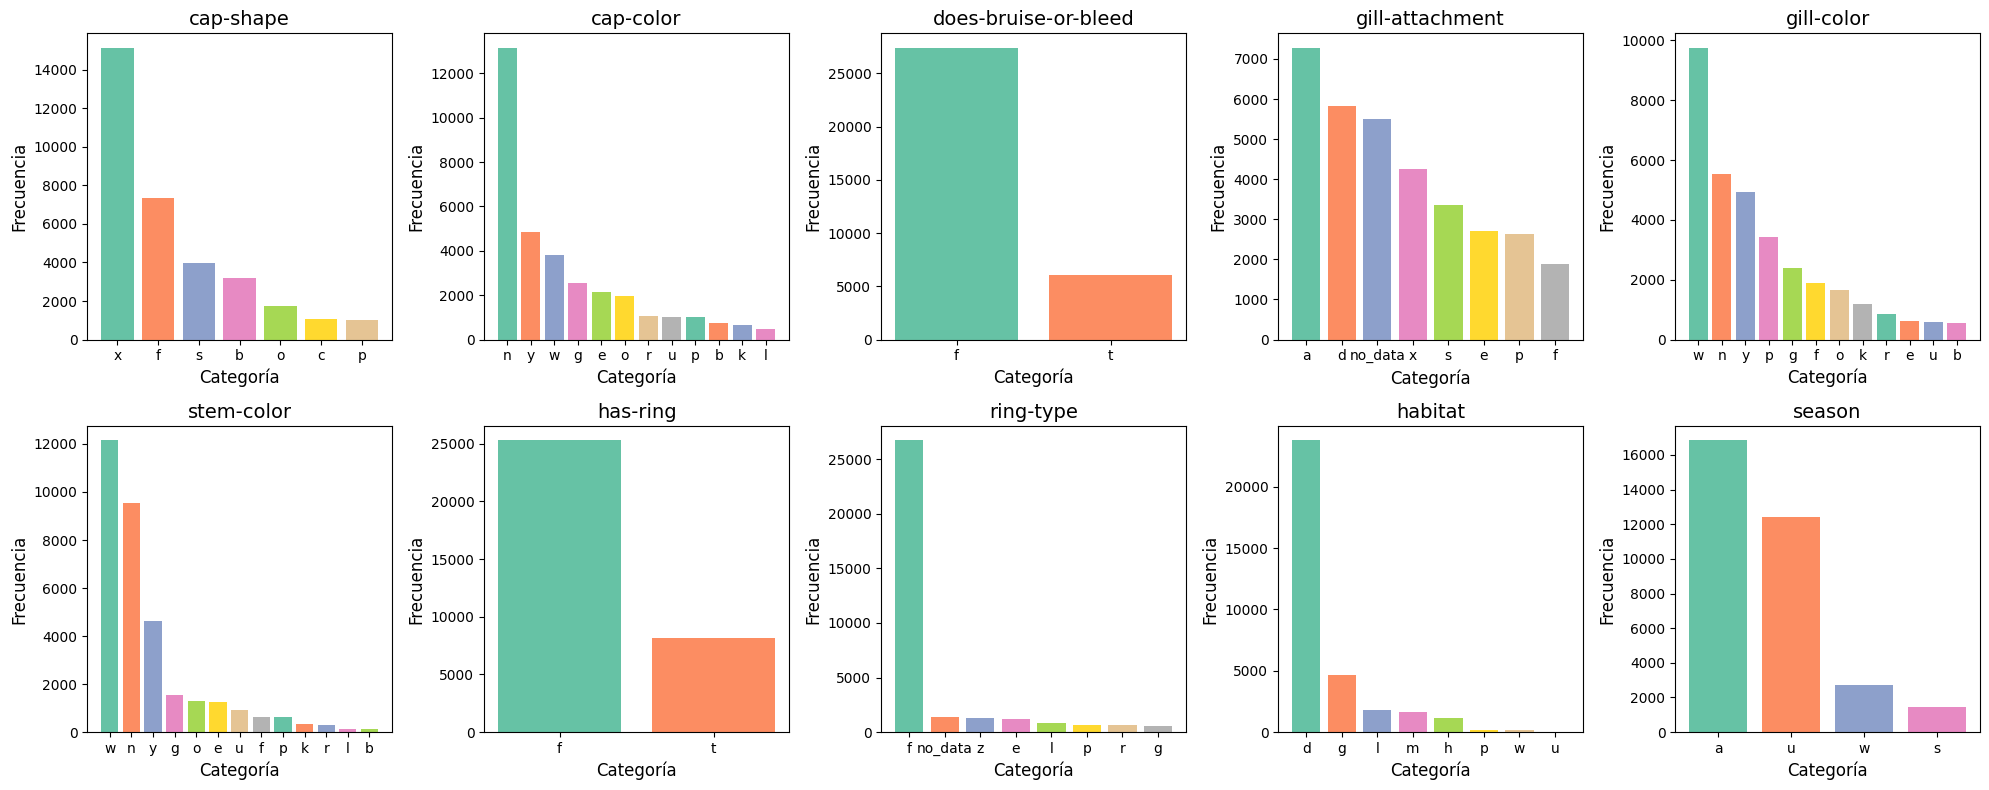

In [199]:
import matplotlib.pyplot as plt
import pandas as pd

fila = 0
columna = 0

columnas = Xtrain.select_dtypes(include='object').columns

fig, axs = plt.subplots(2, 5, figsize=(20, 8))

plt.subplots_adjust(left=0.1,
                    bottom=0.2,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

for i, columna_actual in enumerate(columnas):
    ax = axs[fila, columna]


    conteo = Xtrain[columna_actual].value_counts()

    ax.bar(conteo.index.astype(str),
          conteo.values,
           color=plt.cm.Set2.colors[:len(conteo)])

    ax.set_title(columna_actual, fontsize=14)
    ax.set_xlabel('Categoría', fontsize=12)
    ax.set_ylabel('Frecuencia', fontsize=12)

    columna += 1
    if columna == 5:
        fila += 1
        columna = 0


plt.tight_layout()
plt.show()

In [200]:
#Se aplicara un Estandarizacion para tener todas las variables en una misma escala
# y como la data no tiene toda la misma distribución se aplicara Yeo-Johnson

scaler = StandardScaler()
YeoJ_transformer = PowerTransformer('yeo-johnson',
                                    standardize=False)

XtrainT = Xtrain.copy()
XvalT = Xval.copy()
XtestT = Xtest.copy()

#### Fit_transform con training df para evitar data leakeage.

columnas_transf   = Xtrain.select_dtypes(include=np.number).columns

XtrainT[columnas_transf]   =   YeoJ_transformer.fit_transform(XtrainT[columnas_transf])
XvalT[columnas_transf]     =   YeoJ_transformer.transform(XvalT[columnas_transf])
XtestT[columnas_transf]    =   YeoJ_transformer.transform(XtestT[columnas_transf])


# Estandarización

XtrainT[columnas_transf] = scaler.fit_transform(XtrainT[columnas_transf])
XvalT[columnas_transf]   = scaler.transform(XvalT[columnas_transf])
XtestT[columnas_transf]  = scaler.transform(XtestT[columnas_transf])



In [201]:
print("Media y Desviación Estándar de XtrainT:")
print("Media:")
print(XtrainT[columnas_transf].mean())
print("Desviación Estándar:")
print(XtrainT[columnas_transf].std())

print("\nMedia y Desviación Estándar de XvalT:")
print("Media:")
print(XvalT[columnas_transf].mean())
print("Desviación Estándar:")
print(XvalT[columnas_transf].std())

print("\nMedia y Desviación Estándar de XtestT:")
print("Media:")
print(XtestT[columnas_transf].mean())
print("Desviación Estándar:")
print(XtestT[columnas_transf].std())


Media y Desviación Estándar de XtrainT:
Media:
cap-diameter   -5.938101e-17
stem-height     3.447844e-17
stem-width      9.126958e-17
dtype: float64
Desviación Estándar:
cap-diameter    1.000015
stem-height     1.000015
stem-width      1.000015
dtype: float64

Media y Desviación Estándar de XvalT:
Media:
cap-diameter    0.009233
stem-height    -0.001018
stem-width      0.001819
dtype: float64
Desviación Estándar:
cap-diameter    0.988535
stem-height     0.998941
stem-width      0.992958
dtype: float64

Media y Desviación Estándar de XtestT:
Media:
cap-diameter    0.000821
stem-height    -0.011954
stem-width     -0.006240
dtype: float64
Desviación Estándar:
cap-diameter    0.989180
stem-height     0.991389
stem-width      1.000703
dtype: float64


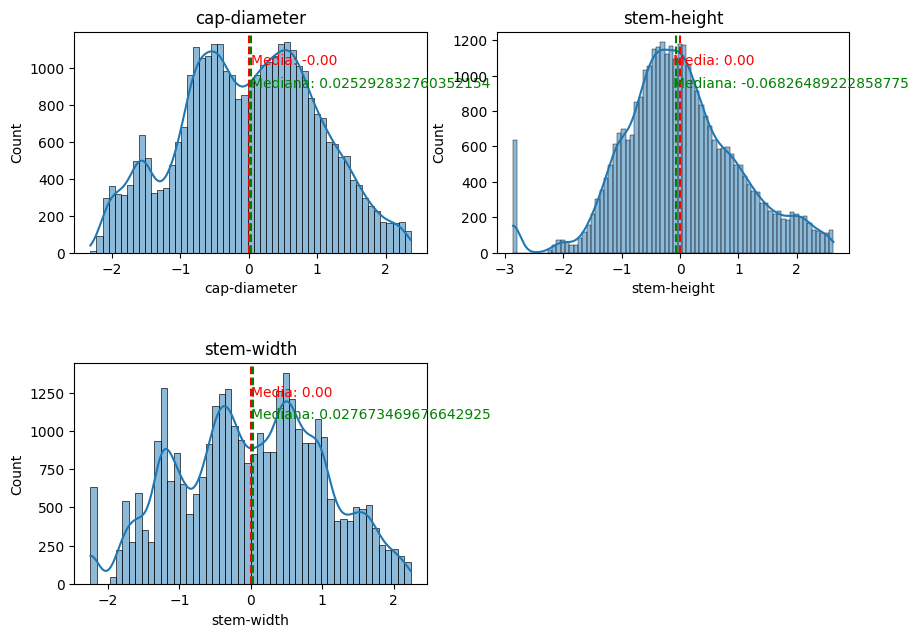

In [202]:
fila = 0
columna = 0

columnas = XtrainT.select_dtypes(include=np.number).columns

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

plt.subplots_adjust(right=0.9, top=0.8, hspace=0.5)

for i, columna_actual in enumerate(columnas[:3]):

    ax = axs[fila, columna]
    sns.histplot(XtrainT[columna_actual], ax=ax, kde=True)
    ax.set_title(columna_actual)

    media = XtrainT[columna_actual].mean()
    mediana = XtrainT[columna_actual].median()

    ax.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
    ax.axvline(mediana, color='green', linestyle='--', label=f'Mediana: {mediana}')

    ax.text(0.5, 0.85, f'Media: {media:.2f}', transform=ax.transAxes, color='red')
    ax.text(0.5, 0.75, f'Mediana: {mediana}', transform=ax.transAxes, color='green')

    columna += 1
    if columna == 2:
        fila += 1
        columna = 0

axs[fila, columna].axis('off')

plt.show()


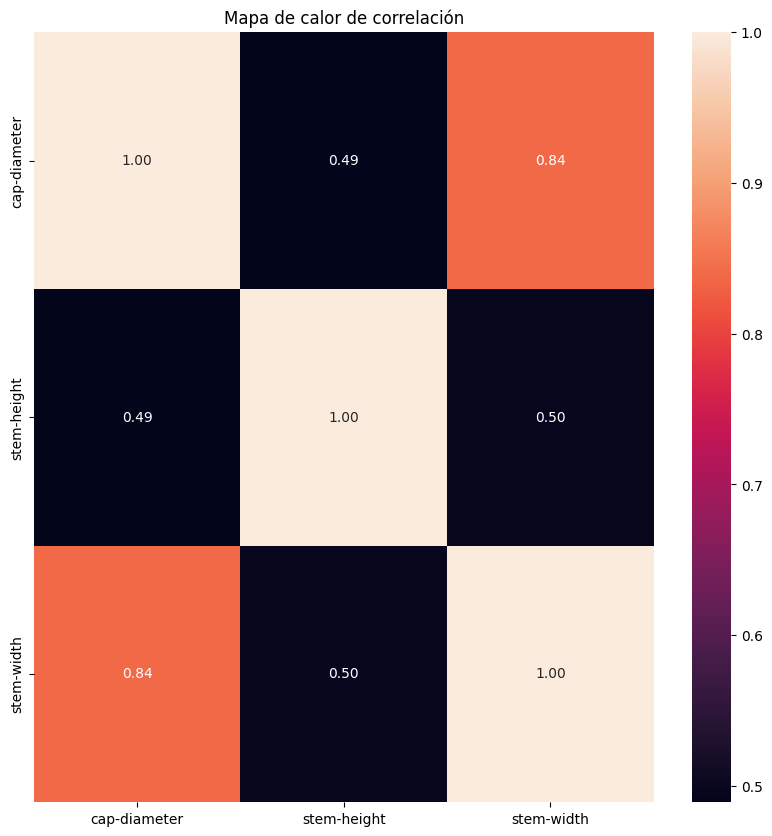

In [203]:
# Matriz de correlación
correlacion_num = pd.concat([ytrain, XtrainT],axis=1).corr(numeric_only = True)

# Crear un mapa de calor
plt.figure(figsize=(10, 10))

sns.heatmap(correlacion_num, annot=True, fmt=".2f")

plt.title("Mapa de calor de correlación")
plt.show()

In [204]:
#Alta correlacion entre cap diameter y stem width - eliminaremos stem width para evitar multicolinealidad dentro del modelo

XtrainT.drop(columns=['stem-width'], inplace=True)
XvalT.drop(  columns=['stem-width'], inplace=True)
XtestT.drop(  columns=['stem-width'], inplace=True)

### Procesamiento Datos Categoricos

Additional Variable Information

One binary class divided in edible=e and poisonous=p (with the latter one also containing mushrooms of unknown edibility).
Twenty remaining variables (n: nominal, m: metrical)
1. cap-diameter (m): float number in cm
2. cap-shape (n): bell=b, conical=c, convex=x, flat=f,
sunken=s, spherical=p, others=o
3. cap-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s,
shiny=h, leathery=l, silky=k, sticky=t,
wrinkled=w, fleshy=e
4. cap-color (n): brown=n, buff=b, gray=g, green=r, pink=p,
purple=u, red=e, white=w, yellow=y, blue=l,
orange=o, black=k
5. does-bruise-bleed (n): bruises-or-bleeding=t,no=f
6. gill-attachment (n): adnate=a, adnexed=x, decurrent=d, free=e,
sinuate=s, pores=p, none=f, unknown=?
7. gill-spacing (n): close=c, distant=d, none=f
8. gill-color (n): see cap-color + none=f
9. stem-height (m): float number in cm
10. stem-width (m): float number in mm
11. stem-root (n): bulbous=b, swollen=s, club=c, cup=u, equal=e,
rhizomorphs=z, rooted=r
12. stem-surface (n): see cap-surface + none=f
13. stem-color (n): see cap-color + none=f
14. veil-type (n): partial=p, universal=u
15. veil-color (n): see cap-color + none=f
16. has-ring (n): ring=t, none=f
17. ring-type (n): cobwebby=c, evanescent=e, flaring=r, grooved=g,
large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
18. spore-print-color (n): see cap color
19. habitat (n): grasses=g, leaves=l, meadows=m, paths=p, heaths=h,
urban=u, waste=w, woods=d
20. season (n): spring=s, summer=u, autumn=a, winter=w

'''Al ser variables nominales (*Verificar cardinalidad) se aplica one hot encoding, y para does-bruise-or-bleed	y has-ring se pueden considerar como binarias.'''

In [205]:
XtrainT.select_dtypes(include='object').describe()

,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-color,has-ring,ring-type,habitat,season
count,33437,33437,33437,33437,33437,33437,33437,33437,33437,33437
unique,7,12,2,8,12,13,2,8,8,4
top,x,n,f,a,w,w,f,f,d,a
freq,15121,13146,27383,7274,9749,12148,25284,26729,23772,16839


In [206]:
label_encoder = LabelEncoder()

bin_columns = ['does-bruise-or-bleed','has-ring']

for i in bin_columns:
  XtrainT[i] = label_encoder.fit_transform(XtrainT[i])
  XvalT[i]   = label_encoder.transform(XvalT[i])
  XtestT[i]  = label_encoder.transform(XtestT[i])

In [207]:
XtrainT.select_dtypes(include='object').describe()

,cap-shape,cap-color,gill-attachment,gill-color,stem-color,ring-type,habitat,season
count,33437,33437,33437,33437,33437,33437,33437,33437
unique,7,12,8,12,13,8,8,4
top,x,n,a,w,w,f,d,a
freq,15121,13146,7274,9749,12148,26729,23772,16839


In [208]:
nominal_encoder =  OneHotEncoder(drop='first',
                                 sparse_output=False)

nominales = XtrainT.select_dtypes(include='object').columns

train_NominalDf = pd.DataFrame()
test_NominalDf  = pd.DataFrame()
val_NominalDf   = pd.DataFrame()

for i in nominales:
  #Train
  NominalTrain = nominal_encoder.fit_transform(XtrainT[[i]])

  NominalTrain_df = pd.DataFrame(NominalTrain)
  NominalTrain_df.columns = nominal_encoder.get_feature_names_out()
  train_NominalDf = pd.concat([train_NominalDf , NominalTrain_df],axis=1)

  #Test
  NominalTTest = nominal_encoder.transform(XtestT[[i]])

  NominalTTest_df = pd.DataFrame(NominalTTest)
  NominalTTest_df.columns = nominal_encoder.get_feature_names_out()
  test_NominalDf = pd.concat([test_NominalDf , NominalTTest_df],axis=1)

  #Validation
  NominalVal = nominal_encoder.transform(XvalT[[i]])

  NominalVal_df = pd.DataFrame(NominalVal)
  NominalVal_df.columns = nominal_encoder.get_feature_names_out()
  val_NominalDf = pd.concat([val_NominalDf , NominalVal_df],axis=1)

In [209]:
XtrainT.drop(columns = XtrainT.select_dtypes(include='object').columns, inplace=True)
XtestT.drop( columns = XtestT.select_dtypes(include='object').columns, inplace=True)
XvalT.drop (columns  = XvalT.select_dtypes(include='object').columns, inplace=True)

XtrainT = pd.concat([XtrainT, train_NominalDf.set_index(XtrainT.index)], axis=1)
XtestT  = pd.concat([XtestT,   test_NominalDf.set_index(XtestT.index)] , axis=1)
XvalT   = pd.concat([XvalT,     val_NominalDf.set_index(XvalT.index)]  , axis=1)


In [210]:
ytrainT = ytrain.copy()
yvalT   = yval.copy()
ytestT  = ytest.copy()

ytrainT = pd.DataFrame(ytrainT, columns=['class'])
yvalT   = pd.DataFrame(yvalT, columns=['class'])
ytestT  = pd.DataFrame(ytestT, columns=['class'])

ytrainT['class'] = label_encoder.fit_transform(ytrainT['class'])
yvalT['class']   = label_encoder.transform(yvalT['class'])
ytestT['class']  = label_encoder.transform(ytestT['class'])

ytrainT = ytrainT['class']
yvalT   = yvalT['class']
ytestT  = ytestT['class']

* Observaciones generales por columnas relevantes

In [211]:
data_check_trainT = pd.concat([ytrain, XtrainT],axis=1)
data_check_trainT

data_check_train = pd.concat([ytrain, Xtrain],axis=1)
data_check_train

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
33895,p,6.80,x,p,f,s,p,4.19,8.68,p,f,f,d,w
57509,p,1.58,o,n,f,no_data,n,4.14,1.44,n,f,f,d,s
23981,p,4.05,x,p,f,x,w,5.36,6.70,w,f,f,d,a
11502,e,1.63,c,n,f,a,w,5.52,1.54,g,f,f,d,a
4925,e,2.04,x,b,f,no_data,w,7.31,4.96,w,f,f,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47589,p,2.96,b,n,f,a,n,9.50,2.66,n,f,f,g,a
30135,p,9.05,s,p,t,d,p,8.65,17.25,p,t,f,d,u
26214,e,11.56,f,y,f,x,n,6.94,24.73,p,f,f,d,a
20661,e,3.51,x,o,f,a,o,4.68,6.40,e,f,f,m,w


<Axes: xlabel='stem-height', ylabel='Count'>

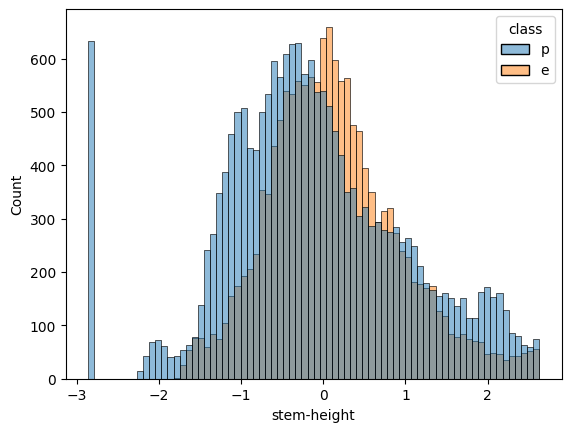

In [212]:
sns.histplot(data=data_check_trainT, x="stem-height", hue="class")

<Axes: xlabel='cap-diameter', ylabel='Count'>

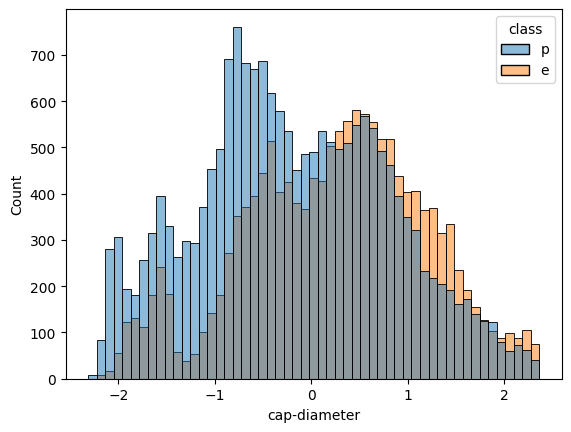

In [213]:
sns.histplot(data=data_check_trainT, x= "cap-diameter", hue="class")

In [214]:
cap_color = data_check_train.groupby(['cap-color', 'class'])["cap-color"].count().reset_index(name='Counts')
fig =px.bar(cap_color, y ="Counts", x ="cap-color", color="class")
fig.show()

cap_color = data_check_train.groupby(['gill-color', 'class'])["gill-color"].count().reset_index(name='Counts')
fig =px.bar(cap_color, y ="Counts", x ="gill-color", color="class")
fig.show()

## Modelo de Machine Learning

De acuerdo con la naturaleza de los datos y al tratarse de un problema de clasificación binaria, en donde lo que se busca es predecir si un mushroom es completamente comestible o venenoso; se decidió trabajar con un modelo de random forest para tratar de obtener el mejor rendimiento al hacer la predicción de los datos, además, se logró una combinación efectiva en la configuración de los parámetros del modelo que dan como resultado un buen rendimiento.

In [215]:
def get_and_print_metrics(model_name, y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  print('-' * 50)
  print(model_name + ':')
  print(f'Accuracy: {accuracy:.4f}')
  print(f'Precision: {precision:.4f}')
  print(f'Recall: {recall:.4f}')
  print(f'F1-Score: {f1:.4f}')
  print(classification_report(y_true, y_pred))
  print('-' * 50)

In [216]:
# Modelo Random Forest
model = RandomForestClassifier(
    n_estimators=10,
    max_depth=8,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)
model.fit(XtrainT, ytrainT)
ypred_test = model.predict(XtestT)
ypred_val = model.predict(XvalT)

# Obtención de métricas de rendimiento para test y val
get_and_print_metrics('Random Forest (Test)', ytestT, ypred_test)
get_and_print_metrics('Random Forest (Validation)', yvalT, ypred_val)

--------------------------------------------------
Random Forest (Test):
Accuracy: 0.8826
Precision: 0.8927
Recall: 0.8991
F1-Score: 0.8959
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4882
           1       0.89      0.90      0.90      6264

    accuracy                           0.88     11146
   macro avg       0.88      0.88      0.88     11146
weighted avg       0.88      0.88      0.88     11146

--------------------------------------------------
--------------------------------------------------
Random Forest (Validation):
Accuracy: 0.8802
Precision: 0.8865
Recall: 0.9025
F1-Score: 0.8944
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4882
           1       0.89      0.90      0.89      6264

    accuracy                           0.88     11146
   macro avg       0.88      0.88      0.88     11146
weighted avg       0.88      0.88      0.88     11146

---------